─────────────────────────────────────────────────── Performance ───────────────────────────────────────────────────

Mock Trading Results ────────────────────────────────────────

┌──────────────────────┬───────────────────────────────────────────┐
│ Field                │ Value                                     │
├──────────────────────┼───────────────────────────────────────────┤
│ Strategy             │ 10 EMA / 30 EMA Crossover (filtered+risk) │
├──────────────────────┼───────────────────────────────────────────┤
│ Initial capital      │ $10,000.00                                │
├──────────────────────┼───────────────────────────────────────────┤
│ Final capital        │ $10,069.29                                │
├──────────────────────┼───────────────────────────────────────────┤
│ Net P&L              │ $69.29                                    │
├──────────────────────┼───────────────────────────────────────────┤
│ Return %             │ 0.69%                                     │
├──────────────────────┼───────────────────────────────────────────┤
│ Trades               │ 18                                        │
├──────────────────────┼───────────────────────────────────────────┤
│ Winning trades       │ 7                                         │
├──────────────────────┼───────────────────────────────────────────┤
│ Losing trades        │ 11                                        │
├──────────────────────┼───────────────────────────────────────────┤
│ Win rate             │ 38.89%                                    │
├──────────────────────┼───────────────────────────────────────────┤
│ Average trade return │ 0.05%                                     │
└──────────────────────┴───────────────────────────────────────────┘

Trades ────────────────────────────────────────

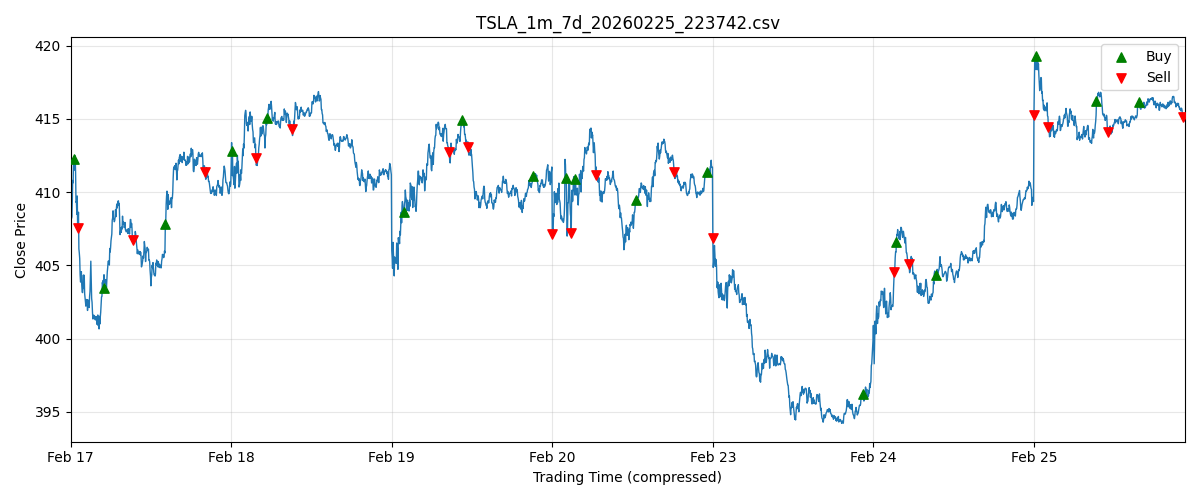

┌────┬──────────────────┬──────────────────┬────────┬────────┬────────┬──────────┬──────────┐
│  # │ Entry Time       │ Exit Time        │ Entry  │ Exit   │ Shares │      P&L │ Return % │
├────┼──────────────────┼──────────────────┼────────┼────────┼────────┼──────────┼──────────┤
│  1 │ 2026-02-17 09:37 │ 2026-02-17 09:47 │ 412.24 │ 407.58 │     24 │ $-111.82 │   -1.13% │
├────┼──────────────────┼──────────────────┼────────┼────────┼────────┼──────────┼──────────┤
│  2 │ 2026-02-17 10:50 │ 2026-02-17 12:02 │ 403.48 │ 406.75 │     24 │   $78.56 │    0.81% │
├────┼──────────────────┼──────────────────┼────────┼────────┼────────┼──────────┼──────────┤
│  3 │ 2026-02-17 13:20 │ 2026-02-17 14:57 │ 407.80 │ 411.40 │     24 │   $86.28 │    0.88% │
├────┼──────────────────┼──────────────────┼────────┼────────┼────────┼──────────┼──────────┤
│  4 │ 2026-02-18 09:33 │ 2026-02-18 10:30 │ 412.82 │ 412.36 │     24 │  $-11.16 │   -0.11% │
├────┼──────────────────┼──────────────────┼────────┼────────┼────────┼──────────┼──────────┤
│  5 │ 2026-02-18 10:58 │ 2026-02-18 11:58 │ 415.06 │ 414.28 │     24 │  $-18.62 │   -0.19% │
├────┼──────────────────┼──────────────────┼────────┼────────┼────────┼──────────┼──────────┤
│  6 │ 2026-02-19 09:59 │ 2026-02-19 11:49 │ 408.65 │ 412.73 │     24 │   $97.97 │    1.00% │
├────┼──────────────────┼──────────────────┼────────┼────────┼────────┼──────────┼──────────┤
│  7 │ 2026-02-19 12:20 │ 2026-02-19 12:36 │ 414.96 │ 413.06 │     24 │  $-45.60 │   -0.46% │
├────┼──────────────────┼──────────────────┼────────┼────────┼────────┼──────────┼──────────┤
│  8 │ 2026-02-19 15:14 │ 2026-02-20 09:30 │ 411.13 │ 407.17 │     24 │  $-95.04 │   -0.96% │
├────┼──────────────────┼──────────────────┼────────┼────────┼────────┼──────────┼──────────┤
│  9 │ 2026-02-20 10:04 │ 2026-02-20 10:16 │ 410.96 │ 407.18 │     24 │  $-90.72 │   -0.92% │
├────┼──────────────────┼──────────────────┼────────┼────────┼────────┼──────────┼──────────┤
│ 10 │ 2026-02-20 10:26 │ 2026-02-20 11:17 │ 410.89 │ 411.15 │     24 │    $6.32 │    0.06% │
├────┼──────────────────┼──────────────────┼────────┼────────┼────────┼──────────┼──────────┤
│ 11 │ 2026-02-20 12:53 │ 2026-02-20 14:26 │ 409.45 │ 411.41 │     24 │   $47.16 │    0.48% │
├────┼──────────────────┼──────────────────┼────────┼────────┼────────┼──────────┼──────────┤
│ 12 │ 2026-02-20 15:47 │ 2026-02-23 09:30 │ 411.37 │ 406.88 │     24 │ $-107.79 │   -1.09% │
├────┼──────────────────┼──────────────────┼────────┼────────┼────────┼──────────┼──────────┤
│ 13 │ 2026-02-23 15:34 │ 2026-02-24 10:21 │ 396.18 │ 404.57 │     24 │  $201.24 │    2.12% │
├────┼──────────────────┼──────────────────┼────────┼────────┼────────┼──────────┼──────────┤
│ 14 │ 2026-02-24 10:26 │ 2026-02-24 10:56 │ 406.61 │ 405.07 │     24 │  $-36.84 │   -0.38% │
├────┼──────────────────┼──────────────────┼────────┼────────┼────────┼──────────┼──────────┤
│ 15 │ 2026-02-24 12:03 │ 2026-02-25 09:30 │ 404.36 │ 415.25 │     24 │  $261.24 │    2.69% │
├────┼──────────────────┼──────────────────┼────────┼────────┼────────┼──────────┼──────────┤
│ 16 │ 2026-02-25 09:35 │ 2026-02-25 10:05 │ 419.32 │ 414.48 │     24 │ $-116.04 │   -1.15% │
├────┼──────────────────┼──────────────────┼────────┼────────┼────────┼──────────┼──────────┤
│ 17 │ 2026-02-25 12:02 │ 2026-02-25 12:29 │ 416.22 │ 414.08 │     24 │  $-51.24 │   -0.51% │
├────┼──────────────────┼──────────────────┼────────┼────────┼────────┼──────────┼──────────┤
│ 18 │ 2026-02-25 13:45 │ 2026-02-25 15:31 │ 416.14 │ 415.12 │     24 │  $-24.60 │   -0.25% │
└────┴──────────────────┴──────────────────┴────────┴────────┴────────┴──────────┴──────────┘

────────────────────────────────────────────── SOURCE DATA OVERVIEW ───────────────────────────────────────────────

File Metadata ────────────────────────────────────────

┌────────────────────────┬────────────────────────────────────────────────────────────────────────────────────────┐
│ Field                  │ Value                                                                                  │
├────────────────────────┼────────────────────────────────────────────────────────────────────────────────────────┤
│ File name              │ TSLA_1m_7d_20260225_223742.csv                                                         │
├────────────────────────┼────────────────────────────────────────────────────────────────────────────────────────┤
│ Export timestamp token │ 20260225_223742                                                                        │
├────────────────────────┼────────────────────────────────────────────────────────────────────────────────────────┤
│ Exported at            │ 2026-02-25 22:37:42                                                                    │
├────────────────────────┼────────────────────────────────────────────────────────────────────────────────────────┤
│ Export date            │ 2026-02-25                                                                             │
├────────────────────────┼────────────────────────────────────────────────────────────────────────────────────────┤
│ Export time            │ 22:37:42                                                                               │
├────────────────────────┼────────────────────────────────────────────────────────────────────────────────────────┤
│ File age               │ 0:01:59.718425                                                                         │
├────────────────────────┼────────────────────────────────────────────────────────────────────────────────────────┤
│ Stock data source      │ /Users/kristopherpepper/Documents/jupyterProjects/historicalStockTrader/raw_data/TSLA_ │
│                        │ 1m_7d_20260225_223742.csv                                                              │
└────────────────────────┴────────────────────────────────────────────────────────────────────────────────────────┘

Stock Metadata ────────────────────────────────────────

┌───────────────────┬───────┐
│ Field             │ Value │
├───────────────────┼───────┤
│ Ticker            │ TSLA  │
├───────────────────┼───────┤
│ Interval          │ 1m    │
├───────────────────┼───────┤
│ Interval quantity │ 1     │
├───────────────────┼───────┤
│ Interval unit     │ m     │
├───────────────────┼───────┤
│ Period            │ 7d    │
└───────────────────┴───────┘

In [1]:
%matplotlib widget

from constants import capital, stock_data_location
from utils.data.build_file_metadata_rows import build_file_metadata_rows
from utils.data.build_performance_rows import build_performance_rows
from utils.data.build_stock_metadata_rows import build_stock_metadata_rows
from utils.data.parse_stock_filename_metadata import parse_stock_filename_metadata
from utils.data.plot_compressed_trading_chart import plot_compressed_trading_chart
from utils.printing.print_h1 import print_h1
from utils.printing.print_h2 import print_h2
from utils.printing.print_metadata_tables import print_metadata_tables
from utils.printing.print_performance_table import print_performance_table
from utils.printing.print_trades_table import print_trades_table
from utils.trading_algorithms.run_mock_ema_crossover_backtest import run_mock_ema_crossover_backtest

metadata = parse_stock_filename_metadata(stock_data_location)
file_metadata_rows = build_file_metadata_rows(metadata, stock_data_location)
stock_metadata_rows = build_stock_metadata_rows(metadata)

print_h1("Performance")
performance = run_mock_ema_crossover_backtest(
    csv_path=stock_data_location,
    initial_capital=capital,
)
performance_rows = build_performance_rows(performance)
print_performance_table(performance_rows)

print_h2("Trades")
plot_compressed_trading_chart(
    csv_path=stock_data_location,
    ticker=metadata["ticker"],
    interval=metadata["interval"],
    trades=performance["trades"],
)
print_trades_table(performance["trades"])

print_h1("SOURCE DATA OVERVIEW")
print_metadata_tables(file_metadata_rows, stock_metadata_rows)